### **IT trends analysis | Ad-hoc analysis**

**Data source:** RDBMS (SQLITE)

**Scenario:** Perform analysis according to the request

Here we assume that this is an additional request, separate to the main analysis. I am connecting directly to the database (represented by a sqlite file). The data needs some cleaning, as already discovered during the preprocessing task. However, this time, we're ok with simpler techniques (like dropping nans). Due to that fact, the results might be a bit different compared to the main analysis.

The main goal here is to depend on SQL queries rather than Python.

**Skills demonstrated:**

* Python (Pandas, Seaborn, Matplotlib, Numpy, Sqlite3)
* SQL
* Descriptive statistics
* Data visualization
* Clean coding

**Performed by:** Jarek Krzysztofik

***

**Request details**

1. Visualize the distribution of data. Focus on Salary and Age.
2. Visualize the relationship between two features.
3. Visualize composition of data
4. Visualize comparison of data
    * Median CovertedComp for ages from 45 to 60
    * Main Branch

***

In [1]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

## Connect to the database

In [2]:
conn = sqlite3.connect(r"C:\Users\krzys\Desktop\Python\IBM DA Capstone Project_Portfolio version\1. Raw_data\survey_data.sqlite")

Although it does not matter for such a small dataset, I will follow the good practices and query only the specific data that I need, rather than importing the whole tables.

## 1. Visualize the distribution of data

**1.1. Salary**

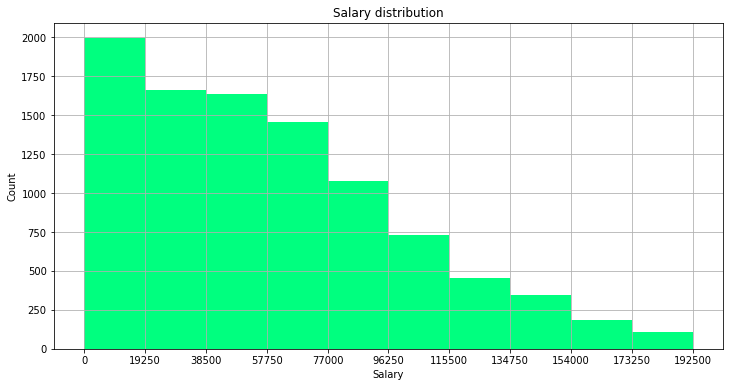

In [3]:
QUERY = """
SELECT ConvertedComp
FROM master
WHERE ConvertedComp IS NOT NULL
AND ConvertedComp <= 193796
"""
#193796 is an upper bound, already identified during pre-processing.

df = pd.read_sql_query(QUERY, conn)

count, bin_edges = np.histogram(df.ConvertedComp)

df.ConvertedComp.plot(kind='hist', 
                      bins=10, 
                      xticks=bin_edges,
                      grid=True,
                      figsize=(12,6),
                      color='springgreen')
plt.title('Salary distribution')
plt.xlabel('Salary')
plt.ylabel('Count')

plt.show()

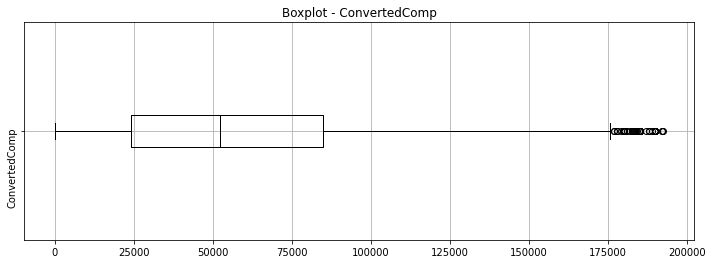

In [4]:
df = pd.read_sql_query(QUERY, conn)

df.boxplot(column='ConvertedComp', 
           figsize=(12,4), 
           color='black',
           vert=False,
           rot=90)
plt.title('Boxplot - ConvertedComp')
plt.show()

**1.2. Age**

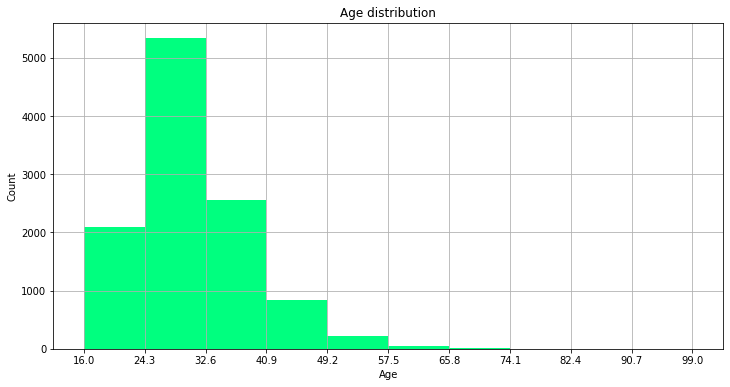

In [5]:
QUERY = """
SELECT Age
FROM master
WHERE Age IS NOT NULL
"""

df = pd.read_sql_query(QUERY, conn)

count, bin_edges = np.histogram(df.Age)

df.Age.plot(kind='hist', 
            bins=10, 
            xticks=bin_edges,
            grid=True,
            figsize=(12,6),
            color='springgreen')
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

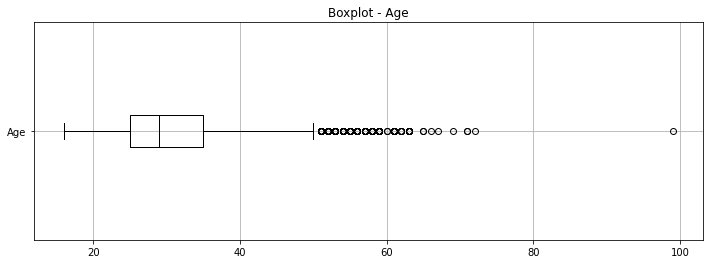

In [6]:
df = pd.read_sql_query(QUERY, conn)

df.boxplot(column='Age', 
           figsize=(12,4), 
           color='black',
           vert=False)
plt.title('Boxplot - Age')
plt.show()

## 2. Visualizing relationships in data

**2.1. Age and WorkWeekHrs**

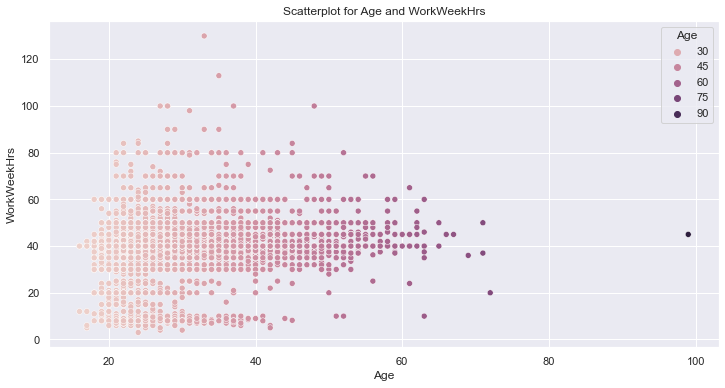

In [7]:
QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs 
FROM master
WHERE WorkWeekHrs < 140
AND Age IS NOT NULL
"""
#I am assuming it is not possible to work more than 140h per week.

df = pd.read_sql_query(QUERY, conn)

sns.set(rc={'figure.figsize':(12,6)})
sns.scatterplot(data=df, 
                x='Age', 
                y='WorkWeekHrs', 
                hue='Age')
plt.title('Scatterplot for Age and WorkWeekHrs')
plt.show()

**2.2. WorkWeekHrs, CodeRevHrs**

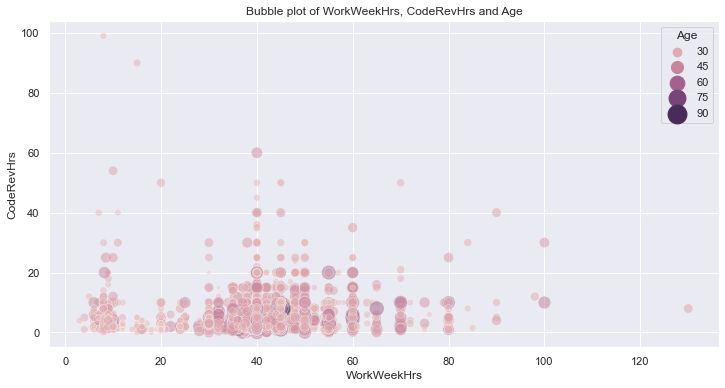

In [8]:
df = pd.read_sql_query(QUERY, conn)

sns.set(rc={'figure.figsize':(12,6)})
sns.scatterplot(data=df, 
                x='WorkWeekHrs', 
                y='CodeRevHrs', 
                size='Age',
                hue='Age',
                alpha=0.5,
                sizes=(10,400))
plt.title('Bubble plot of WorkWeekHrs, CodeRevHrs and Age')
plt.show()


## 3. Visualizing Composition of data

In [10]:
def create_bar_chart(column, title, figsize=(12,6)):
    
    df_db = pd.read_sql_query(QUERY, conn)
    df_db.set_index(column, inplace=True) 

    df_db['count'].plot(kind='bar', 
                        figsize=(12,6),
                        color='springgreen',
                        rot=0)
                                      
    plt.title(title)
    plt.xlabel('')
    plt.show()


def create_pie_chart(column, title, figsize=(10,12)):

    df_db = pd.read_sql_query(QUERY, conn)
    df_db.set_index(column, inplace=True) 

    colors=['springgreen', 'lightgrey', 'lightblue', 'thistle', 'forestgreen']

    df_db['count'].plot(kind='pie', 
                        figsize=figsize, 
                        autopct='%1.1f%%', 
                        labels=None, 
                        startangle=90, 
                        colors=colors) 
                                      
    plt.legend(labels=df_db.index, loc='upper right')
    plt.title(title)
    plt.show()


def create_bar_pie_chart(column, title):

    create_bar_chart(column, title, figsize=(12,6))
    create_pie_chart(column, title, figsize=(10,12))

**3.1. Top 5 Languages**

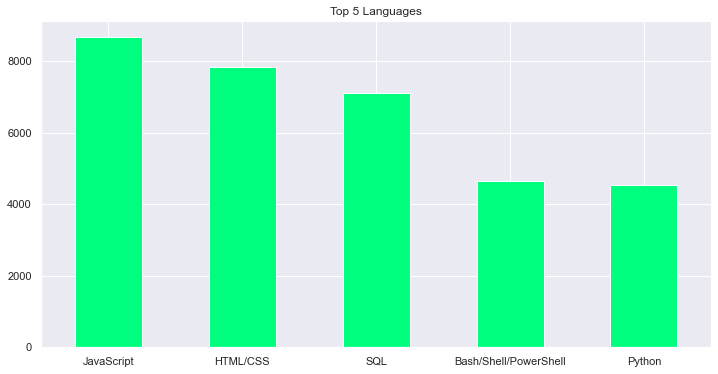

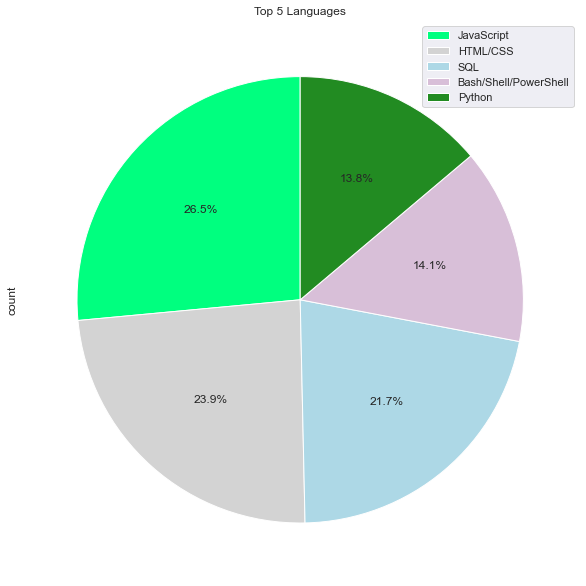

In [11]:
QUERY = """
SELECT 
	LanguageWorkedWith,
	COUNT(*) AS count
FROM LanguageWorkedWith
GROUP BY LanguageWorkedWith
ORDER BY COUNT(LanguageWorkedWith) DESC
LIMIT 5
"""

create_bar_pie_chart('LanguageWorkedWith', 'Top 5 Languages')

**3.2. Top 5 Languages Respondents Wish to Learn Next Year**

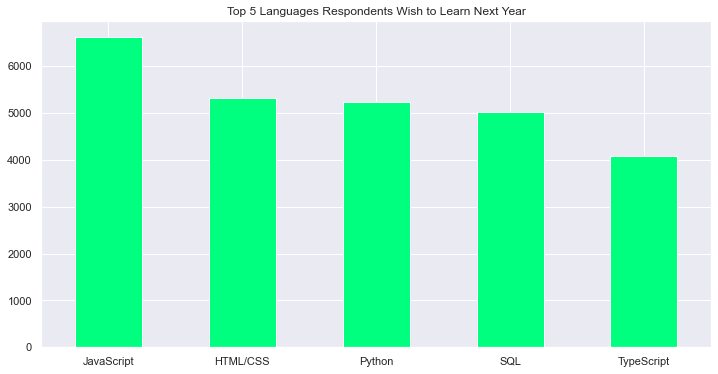

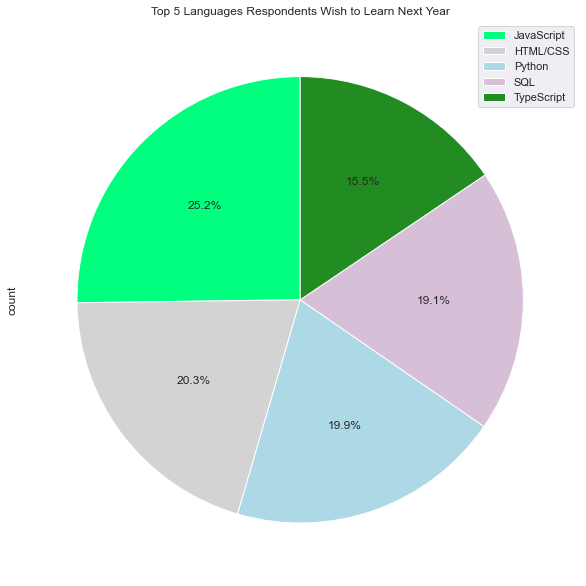

In [12]:
QUERY = """
SELECT 
	LanguageDesireNextYear,
	COUNT(*) AS count
FROM LanguageDesireNextYear
GROUP BY LanguageDesireNextYear
ORDER BY COUNT(LanguageDesireNextYear) DESC
LIMIT 5
"""

create_bar_pie_chart('LanguageDesireNextYear', 'Top 5 Languages Respondents Wish to Learn Next Year')

**3.3. Top 5 Databases**

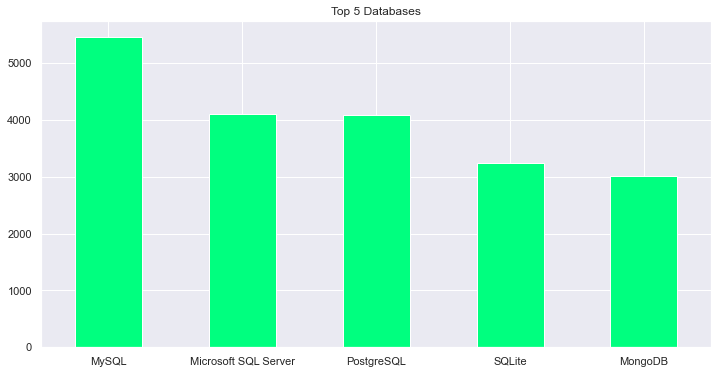

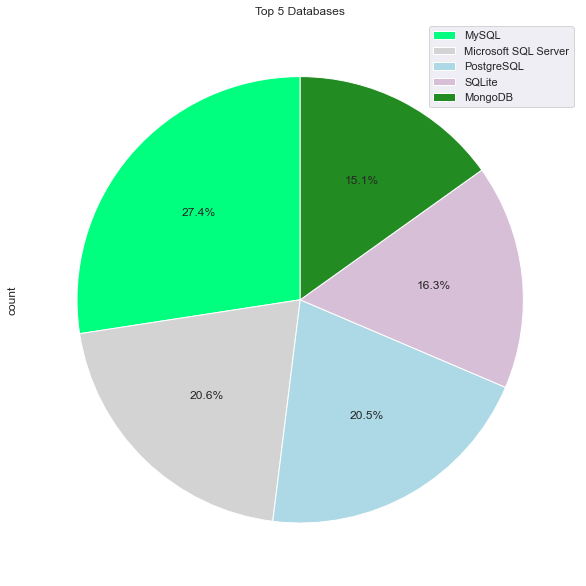

In [13]:
QUERY = """
SELECT 
	DatabaseWorkedWith,
	COUNT(*) AS count
FROM DatabaseWorkedWith
GROUP BY DatabaseWorkedWith 
ORDER BY COUNT(DatabaseWorkedWith) DESC
LIMIT 5
"""

create_bar_pie_chart('DatabaseWorkedWith', 'Top 5 Databases')

**3.4. Top 5 Databases Respondents Wish to Learn Next Year**

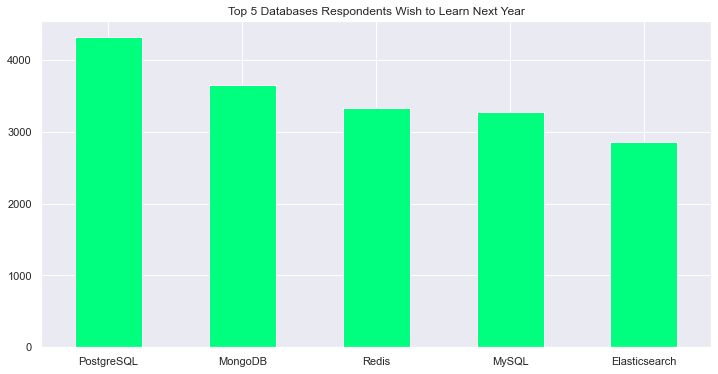

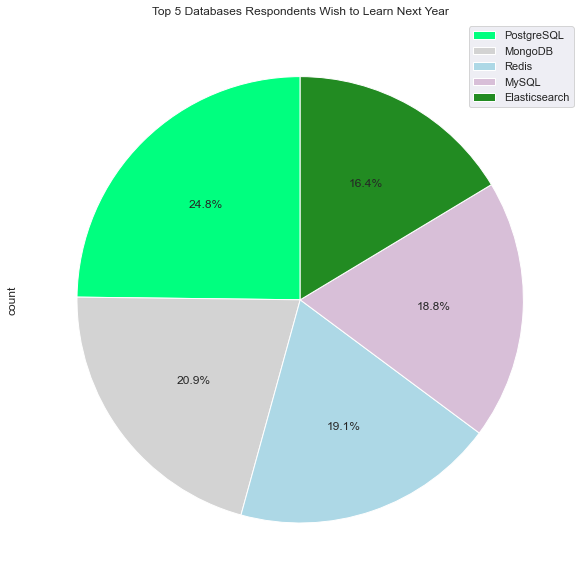

In [14]:
QUERY = """
SELECT 
	DatabaseDesireNextYear,
	COUNT(*) AS count
FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear 
ORDER BY COUNT(DatabaseDesireNextYear) DESC
LIMIT 5
"""

create_bar_pie_chart('DatabaseDesireNextYear', 'Top 5 Databases Respondents Wish to Learn Next Year')

## 4. Visualizing comparison of data

**4.1. Median CovertedComp for ages from 45 to 60**

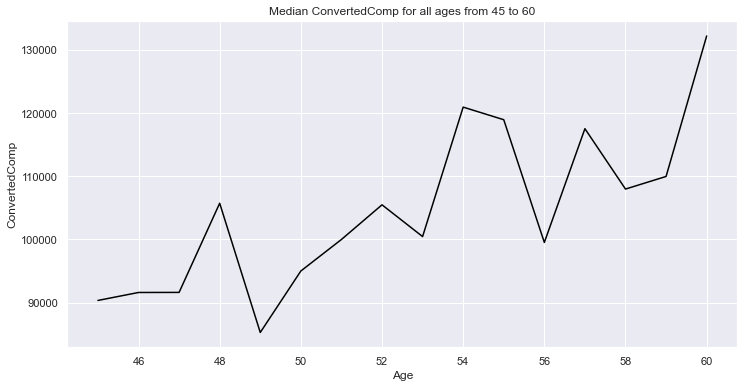

In [15]:
QUERY = """
SELECT Age, ConvertedComp
FROM master
WHERE Age BETWEEN 45 AND 60
ORDER BY Age
"""

df = pd.read_sql_query(QUERY, conn)
df['Age'] = df['Age'].astype(int)

df.groupby('Age').median().plot(kind='line', 
                                figsize=(12,6), 
                                color='black',
                                legend=None)
plt.title('Median ConvertedComp for all ages from 45 to 60')
plt.xlabel('Age')
plt.ylabel('ConvertedComp')
plt.show()

**4.2. MainBranch**

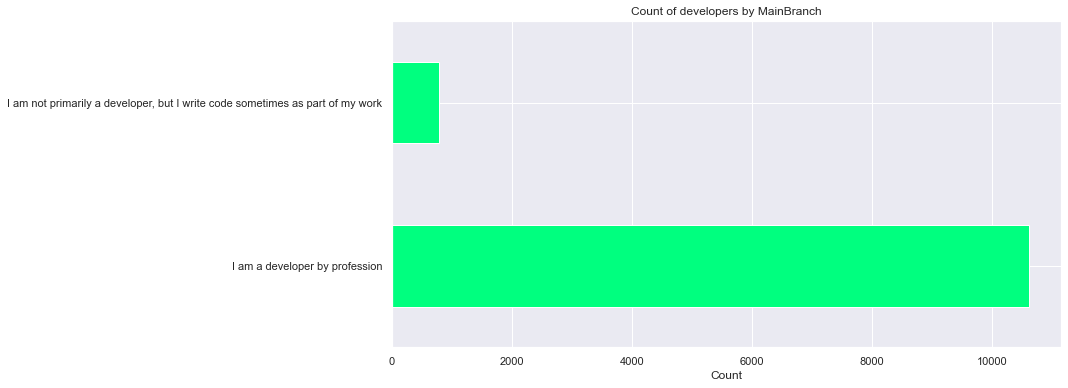

In [16]:
QUERY = """
SELECT 
	MainBranch,
	COUNT(*) AS count
FROM master
GROUP BY MainBranch
"""

df = pd.read_sql_query(QUERY, conn)
df.set_index('MainBranch', inplace=True)

df.plot(kind='barh', 
		figsize=(12,6), 
		color='springgreen', 
		legend=None)
plt.title('Count of developers by MainBranch')
plt.xlabel('Count')
plt.ylabel('')
plt.show()

## Close connection

In [17]:
conn.close()